## Ski resorts

In [205]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("farheenshaukat/ski-resort")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\matan\.cache\kagglehub\datasets\farheenshaukat\ski-resort\versions\1
Path to dataset files: C:\Users\matan\.cache\kagglehub\datasets\farheenshaukat\ski-resort\versions\1


In [206]:
import pandas as pd

# Assuming the dataset is a CSV file in the downloaded path
import os

# Find a CSV file in the downloaded directory
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
if csv_files:
    data_file = os.path.join(path, csv_files[0])
    # Try with encoding='latin1' if utf-8 fails
    try:
        ski_df = pd.read_csv(data_file)
    except UnicodeDecodeError:
        ski_df = pd.read_csv(data_file, encoding='latin1')
    print("Columns:", list(ski_df.columns))
    print(ski_df.describe())
else:
    print("No CSV file found in the dataset directory.")

ski_df.columns = ski_df.columns.str.strip()





Columns: ['ID', 'Resort', 'Latitude', 'Longitude', 'Country', 'Continent', 'Price', 'Season', 'Highest point', 'Lowest point', 'Beginner slopes', 'Intermediate slopes', 'Difficult slopes', 'Total slopes', 'Longest run', 'Snow cannons', 'Surface lifts', 'Chair lifts', 'Gondola lifts', 'Total lifts', 'Lift capacity', 'Child friendly', 'Snowparks', 'Nightskiing', 'Summer skiing']
               ID    Latitude   Longitude       Price  Highest point  \
count  499.000000  499.000000  499.000000  499.000000     499.000000   
mean   250.000000   43.205684   -6.006784   48.721443    2160.589178   
std    144.193157   15.975790   59.990459   21.718733     774.339805   
min      1.000000  -45.054960 -149.740657    0.000000     163.000000   
25%    125.500000   43.672650    1.380975   36.000000    1594.000000   
50%    250.000000   46.347316    8.206372   45.000000    2175.000000   
75%    374.500000   47.327089   12.429237   54.000000    2700.000000   
max    499.000000   67.784406  176.876668  1

In [207]:
ski_df = ski_df.fillna(0)
non_numeric_cols = ski_df.select_dtypes(include=['object']).columns

for col in non_numeric_cols:
    # Convert to numeric codes
    ski_df[col+"_numeric"], _ = pd.factorize(ski_df[col])
ski_df.head()

,ID,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,...,Nightskiing,Summer skiing,Resort_numeric,Country_numeric,Continent_numeric,Season_numeric,Child friendly_numeric,Snowparks_numeric,Nightskiing_numeric,Summer skiing_numeric
0,1,Hemsedal,60.928244,8.383487,Norway,Europe,46,November - May,1450,620,...,Yes,No,0,0,0,0,0,0,0,0
1,2,Geilosiden Geilo,60.534526,8.206372,Norway,Europe,44,November - April,1178,800,...,Yes,No,1,0,0,1,0,0,0,0
2,3,Golm,47.057810,9.828167,Austria,Europe,48,December - April,2110,650,...,No,No,2,1,0,2,0,1,1,0
3,4,Red Mountain Resort-Rossland,49.105520,-117.846280,Canada,North America,60,December - April,2075,1185,...,Yes,No,3,2,1,2,0,0,0,0
4,5,Hafjell,61.230369,10.529014,Norway,Europe,45,November - April,1030,195,...,Yes,No,4,0,0,1,0,0,0,0


In [208]:
print(ski_df.columns)
print(ski_df.iloc[0])  

Index(['ID', 'Resort', 'Latitude', 'Longitude', 'Country', 'Continent',
       'Price', 'Season', 'Highest point', 'Lowest point', 'Beginner slopes',
       'Intermediate slopes', 'Difficult slopes', 'Total slopes',
       'Longest run', 'Snow cannons', 'Surface lifts', 'Chair lifts',
       'Gondola lifts', 'Total lifts', 'Lift capacity', 'Child friendly',
       'Snowparks', 'Nightskiing', 'Summer skiing', 'Resort_numeric',
       'Country_numeric', 'Continent_numeric', 'Season_numeric',
       'Child friendly_numeric', 'Snowparks_numeric', 'Nightskiing_numeric',
       'Summer skiing_numeric'],
      dtype='object')
ID                                     1
Resort                          Hemsedal
Latitude                       60.928244
Longitude                       8.383487
Country                           Norway
Continent                         Europe
Price                                 46
Season                    November - May
Highest point                       1450
Lowe

## Rank Ski DF

In [209]:
rank_path = 'data\\ski-resorts_ranks.csv'
rank_df = pd.read_csv(rank_path)
# Split 'location_coordinate' into 'location_lat' and 'location_long'
def extract_lat(coord):
    try:
        if isinstance(coord, dict):
            return float(coord.get('lat', None))
        elif isinstance(coord, str):
            import ast
            d = ast.literal_eval(coord)
            return float(d.get('lat', None))
    except Exception:
        return None

def extract_log(coord):
    try:
        if isinstance(coord, dict):
            return float(coord.get('long', None))
        elif isinstance(coord, str):
            import ast
            d = ast.literal_eval(coord)
            return float(d.get('long', None))
    except Exception:
        return None

rank_df['location_lat'] = rank_df['location_coordinate'].apply(extract_lat)
rank_df['location_long'] = rank_df['location_coordinate'].apply(extract_log)

# Ensure numeric dtype (coordinates may be strings in the CSV)
rank_df['location_lat'] = pd.to_numeric(rank_df['location_lat'], errors='coerce')
rank_df['location_long'] = pd.to_numeric(rank_df['location_long'], errors='coerce')

rank_df.columns

Index(['rank', 'name', 'rating', 'url', 'location_coordinate',
       'location_country', 'location_region', 'elevation_top_m',
       'elevation_difference_m', 'total_slope_length_km', 'number_of_lifts',
       'number_of_slopes', 'annual_snowfall_cm', 'number_of_matches',
       'location_lat', 'location_long'],
      dtype='object')

In [210]:
rank_df.iloc[0]

rank                                                         1
name                                       4 Vallées (Verbier)
rating                                                  1311.7
url                                     http://www.4vallees.ch
location_coordinate       {'lat': '46.1013', 'long': '7.2263'}
location_country                                   Switzerland
location_region                                         Valais
elevation_top_m                                         3330.0
elevation_difference_m                                  1980.0
total_slope_length_km                                    412.0
number_of_lifts                                           68.0
number_of_slopes                                         307.0
annual_snowfall_cm                                       500.0
number_of_matches                                           65
location_lat                                           46.1013
location_long                                          

# Resort name matching


In [211]:
# Matching algorithm 1 (hybrid: global high-score or same-country with tiered thresholds)
import re
from unidecode import unidecode   # pip install Unidecode
from rapidfuzz import process, fuzz  # pip install rapidfuzz

STOPWORDS = {
    "ski", "resort", "area", "mountain", "mt", "snow",
    "center", "centre", "valley", "park", "domain", "zone"
}

def normalise(name: str) -> str:
    """
    Lower-case, remove accents & punctuation, drop generic words,
    collapse whitespace.  Returns a canonical form suitable for matching.
    """
    n = unidecode(name)
    n = n.lower()
    n = re.sub(r"[()\-_/]", " ", n)
    tokens = re.split(r"\W+", n)
    keep = [t for t in tokens if t and t not in STOPWORDS]
    return " ".join(keep)

# Build keys for fuzzy matching
ski_df["key"]  = ski_df["Resort"].astype(str).map(normalise)
rank_df["key"] = rank_df["name"].astype(str).map(normalise)

# Candidate list over all rank entries (global search)
available_keys = rank_df['key'].dropna().tolist()
used_keys = set()  # Track already-matched keys to prevent duplicates

# Thresholds per requirement (strictly greater than)
STRICT_ACCEPT = 90   # >90: accept globally, ignore country
MISSING_COUNTRY_ACCEPT = 80  # >80: if either country missing
SAME_COUNTRY_ACCEPT = 49     # >49: if both countries present and equal

best_ranks = []
best_names = []
for _, row in ski_df.iterrows():
    key = row.get("key")
    ski_country = row.get("Country")

    # Only consider unused candidates (without replacement matching)
    current_candidates = [k for k in available_keys if k not in used_keys]
    
    if not current_candidates:
        # No more candidates available
        best_ranks.append(None)
        best_names.append(None)
        continue

    # Get top candidates globally by score from available candidates
    cands = process.extract(key, current_candidates, scorer=fuzz.token_set_ratio, limit=10)
    chosen_rank = None
    chosen_name = None
    chosen_key = None

    for cand_key, score, _ in cands:
        # Skip if already used
        if cand_key in used_keys:
            continue
            
        # Fetch candidate row
        rdf = rank_df.loc[rank_df['key'] == cand_key]
        if rdf.empty:
            continue
        r = rdf.iloc[0]
        rank_country = r.get('location_country')

        # Rule 1: score > 90 => accept regardless of country
        if score > STRICT_ACCEPT:
            chosen_rank, chosen_name, chosen_key = r["rank"], r["name"], cand_key
            break

        # Rule 2: score <= 90 => apply country-aware thresholds
        # If either country is missing
        if pd.isna(ski_country) or pd.isna(rank_country) or ski_country == '' or rank_country == '':
            if score > MISSING_COUNTRY_ACCEPT:
                chosen_rank, chosen_name, chosen_key = r["rank"], r["name"], cand_key
                break
            else:
                continue
        # Both countries present
        if str(ski_country) == str(rank_country):
            if score > SAME_COUNTRY_ACCEPT:
                chosen_rank, chosen_name, chosen_key = r["rank"], r["name"], cand_key
                break
            else:
                continue
        else:
            # Countries differ: do not accept this candidate, try next
            continue

    # Mark the chosen key as used to prevent future matches
    if chosen_key is not None:
        used_keys.add(chosen_key)
    
    best_ranks.append(chosen_rank)
    best_names.append(chosen_name)

# Attach results back to ski_df
ski_df["Rank"] = best_ranks
ski_df["Other_name"] = best_names

# Create merged view (do not drop unmatched rows)
merged = ski_df.copy()
# Back-compat for earlier cells that expect lowercase 'rank'
merged["rank"] = merged["Rank"]

# Print required counts
total_rows = len(merged)
non_none_rank = merged["Rank"].notna().sum()
print(f"Total rows in merged df: {total_rows}")
print(f"Rows with Rank: {non_none_rank}")

Total rows in merged df: 499
Rows with Rank: 430


In [212]:
# Count the number of NaN values in the 'rank' column of merged
num_nan_rank = merged['rank'].isna().sum()
merged_clean = merged.dropna(subset=['rank'])

merged_clean.describe()


,ID,Latitude,Longitude,Price,Highest point,Lowest point,Beginner slopes,Intermediate slopes,Difficult slopes,Total slopes,...,Resort_numeric,Country_numeric,Continent_numeric,Season_numeric,Child friendly_numeric,Snowparks_numeric,Nightskiing_numeric,Summer skiing_numeric,Rank,rank
count,430.000000,430.000000,430.000000,430.00000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,...,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,247.158140,45.736542,-12.170925,50.35814,2183.574419,1206.455814,33.072093,39.134884,16.758140,88.965116,...,246.158140,6.762791,0.376744,4.432558,0.002326,0.218605,0.606977,0.030233,483.916279,483.916279
std,142.501472,7.561018,57.305720,21.55174,763.379386,588.327396,49.310509,44.052262,20.045685,101.864946,...,142.501472,4.680915,0.820721,6.028206,0.048224,0.413781,0.488991,0.171426,603.827344,603.827344
min,1.000000,-41.165560,-149.740657,0.00000,492.000000,36.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,126.250000,44.687608,0.206047,38.00000,1609.250000,804.750000,10.000000,14.000000,3.000000,34.000000,...,125.250000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,123.250000,123.250000
50%,244.500000,46.424583,7.741994,46.00000,2205.000000,1133.500000,19.000000,26.000000,9.000000,58.500000,...,243.500000,7.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,281.500000,281.500000
75%,366.750000,47.321482,11.580027,54.75000,2723.750000,1500.000000,32.750000,45.000000,22.000000,100.000000,...,365.750000,10.000000,1.000000,2.750000,0.000000,0.000000,1.000000,0.000000,558.750000,558.750000
max,499.000000,67.784406,147.244179,141.00000,3914.000000,3286.000000,312.000000,239.000000,126.000000,600.000000,...,498.000000,37.000000,4.000000,29.000000,1.000000,1.000000,1.000000,1.000000,3214.000000,3214.000000


In [213]:
merged.columns

Index(['ID', 'Resort', 'Latitude', 'Longitude', 'Country', 'Continent',
       'Price', 'Season', 'Highest point', 'Lowest point', 'Beginner slopes',
       'Intermediate slopes', 'Difficult slopes', 'Total slopes',
       'Longest run', 'Snow cannons', 'Surface lifts', 'Chair lifts',
       'Gondola lifts', 'Total lifts', 'Lift capacity', 'Child friendly',
       'Snowparks', 'Nightskiing', 'Summer skiing', 'Resort_numeric',
       'Country_numeric', 'Continent_numeric', 'Season_numeric',
       'Child friendly_numeric', 'Snowparks_numeric', 'Nightskiing_numeric',
       'Summer skiing_numeric', 'key', 'Rank', 'Other_name', 'rank'],
      dtype='object')

In [214]:
# Quick sanity checks
print(rank_df[["location_lat", "location_long"]].dtypes)
print("Unmatched count:", merged["Rank"].isna().sum())
merged.loc[merged["Rank"].isna(), ["Resort", 'Other_name', 'rank', "Country", "Latitude", "Longitude"]].head(10)

location_lat     float64
location_long    float64
dtype: object
Unmatched count: 69


,Resort,Other_name,rank,Country,Latitude,Longitude
6,Porter,None,NaN,New Zealand,-39.670988,176.876668
7,Nevados de Chilla?n,None,NaN,Chile,-36.613844,-72.071805
15,Treble Cone,None,NaN,New Zealand,-44.632375,168.872825
20,The Lecht,None,NaN,United Kingdom,57.200996,-3.247204
27,Nevis Range,None,NaN,United Kingdom,56.852208,-4.998768
29,The Remarkables,None,NaN,New Zealand,-45.054960,168.815859
46,Obergurgl-Hochgurgl,None,NaN,Austria,46.879426,11.038706
47,Coronet Peak,None,NaN,New Zealand,-44.915891,168.739571
49,Valle Nevado,None,NaN,Chile,-33.352964,-70.248678
50,Ben Lomond,None,NaN,Australia,-30.023715,151.659179


In [215]:
# Debug unmatched rows: inspect same-country fuzzy scores and reasons
from rapidfuzz import process, fuzz

# Use the same THRESHOLD as the matching cell; fallback if missing
try:
    THRESHOLD
except NameError:
    THRESHOLD = 85

# Build helpers
all_keys = rank_df['key'].dropna().tolist()
rank_country_groups = rank_df.groupby('location_country')

unmatched = merged[merged["Rank"].isna()].copy()
print(f"Unmatched rows: {len(unmatched)}")

samples = unmatched.sample(min(10, len(unmatched)), random_state=42) if len(unmatched) > 0 else unmatched

report_rows = []
for _, row in samples.iterrows():
    key = row.get("key")
    country = row.get("Country")
    reason = []

    # If no country or country not present in rank_df, we can't match by rule
    if pd.isna(country) or country not in rank_country_groups.groups:
        reason.append("missing/unknown country in rank_df")
        # Still compute a global best for hints
        best_global = process.extractOne(key, all_keys, scorer=fuzz.token_set_ratio)
        best_global_detail = None
        if best_global is not None:
            cand_key, score, _ = best_global
            r = rank_df.loc[rank_df['key'] == cand_key].iloc[0]
            best_global_detail = {"candidate_name": r["name"], "country": r["location_country"], "score": score}
        report_rows.append({
            "Resort": row.get("Resort"),
            "Country": country,
            "reasons": ", ".join(reason),
            "best_same_country": None,
            "top5_same_country": [],
            "best_global_hint": best_global_detail,
        })
        continue

    # Same-country candidates
    rdf = rank_country_groups.get_group(country)
    country_keys = rdf['key'].dropna().tolist()

    # Get top 5 candidates (same country)
    cands = process.extract(key, country_keys, scorer=fuzz.token_set_ratio, limit=5)

    top5_same = []
    for cand_key, score, _ in cands:
        r = rdf.loc[rdf['key'] == cand_key].iloc[0]
        top5_same.append({
            "candidate_name": r["name"],
            "score": score,
            "country": r["location_country"],
        })

    if not top5_same:
        reason.append("no fuzzy candidates in same country")
        best_same = None
    else:
        # Highest score in same country
        best_same = max(top5_same, key=lambda x: x["score"])
        if best_same["score"] < THRESHOLD:
            reason.append("low fuzzy score in same country")

    # Also compute a global best as a hint
    best_global = process.extractOne(key, all_keys, scorer=fuzz.token_set_ratio)
    best_global_detail = None
    if best_global is not None:
        cand_key, score, _ = best_global
        r = rank_df.loc[rank_df['key'] == cand_key].iloc[0]
        best_global_detail = {"candidate_name": r["name"], "country": r["location_country"], "score": score}
        if best_same and score > best_same["score"] and r["location_country"] != country:
            reason.append("better match exists in other country")

    report_rows.append({
        "Resort": row.get("Resort"),
        "Country": country,
        "reasons": ", ".join(reason) if reason else "unknown",
        "best_same_country": best_same,
        "top5_same_country": top5_same,
        "best_global_hint": best_global_detail,
    })

import pandas as pd
if report_rows:
    # Flatten for display (omit lists)
    debug_flat = []
    for r in report_rows:
        row_out = {k: v for k, v in r.items() if k not in ("top5_same_country",)}
        # stringify best_same_country for compactness
        if row_out.get("best_same_country") is not None:
            b = row_out["best_same_country"]
            row_out["best_same_country"] = f"{b['candidate_name']} (score={b['score']})"
        debug_flat.append(row_out)
    debug_df = pd.DataFrame(debug_flat)
    display(debug_df)

    # Detailed candidates per row
    print("\nCandidate details (same country) per row:")
    for r in report_rows:
        print(f"\n== {r['Resort']} ({r['Country']}) == | reasons: {r['reasons']}")
        for c in r["top5_same_country"]:
            print(f"  - {c['candidate_name']} [country={c['country']}]: score={c['score']}")
        if r["best_global_hint"]:
            g = r["best_global_hint"]
            print(f"  > best_global_hint: {g['candidate_name']} [country={g['country']}]: score={g['score']}")
else:
    print("No unmatched rows to debug.")

Unmatched rows: 69


,Resort,Country,reasons,best_same_country,best_global_hint
0,Soldeu-Pas de la Casa/?Grau Roig/?El Tarter/?C...,Andorra,unknown,Grandvalira (score=100.0),"{'candidate_name': 'Grandvalira', 'country': '..."
1,Porter,New Zealand,missing/unknown country in rank_df,None,"{'candidate_name': 'Powder Mountain', 'country..."
2,Dizin,Iran,missing/unknown country in rank_df,None,"{'candidate_name': 'Dietikon', 'country': 'Swi..."
3,Nevis Range,United Kingdom,missing/unknown country in rank_df,None,"{'candidate_name': 'Snowy Range', 'country': '..."
4,Mount Parnassos-Fterolakka-?Kellaria,Greece,missing/unknown country in rank_df,None,"{'candidate_name': 'Mount Snow', 'country': 'U..."
5,Sauze dOulx (Via Lattea),Italy,unknown,Via Lattea (score=100.0),"{'candidate_name': 'Via Lattea', 'country': 'I..."
6,Portillo,Chile,missing/unknown country in rank_df,None,"{'candidate_name': 'Pratospilla', 'country': '..."
7,Kopaonik,Serbia,missing/unknown country in rank_df,None,"{'candidate_name': 'Antoni', 'country': 'Germa..."
8,Palando?ken-Ejder 3200 World Ski Center-,Turkey,missing/unknown country in rank_df,None,"{'candidate_name': 'Keefer Lake Lodge', 'count..."
9,El Tarter  Pas de la Casa/?Grau Roig/?Soldeu/...,Andorra,unknown,Grandvalira (score=100.0),"{'candidate_name': 'Grandvalira', 'country': '..."



Candidate details (same country) per row:

== Soldeu-Pas de la Casa/?Grau Roig/?El Tarter/?Canillo/?Encamp (Grandvalira) (Andorra) == | reasons: unknown
  - Grandvalira [country=Andorra]: score=100.0
  - Ordino Arcalís [country=Andorra]: score=24.390243902439025
  - Pal/Arinsal [country=Andorra]: score=22.784810126582272
  - Canaro [country=Andorra]: score=16.21621621621621
  > best_global_hint: Grandvalira [country=Andorra]: score=100.0

== Porter (New Zealand) == | reasons: missing/unknown country in rank_df
  > best_global_hint: Powder Mountain [country=USA]: score=66.66666666666666

== Dizin (Iran) == | reasons: missing/unknown country in rank_df
  > best_global_hint: Dietikon [country=Switzerland]: score=61.53846153846154

== Nevis Range (United Kingdom) == | reasons: missing/unknown country in rank_df
  > best_global_hint: Snowy Range [country=USA]: score=63.63636363636363

== Mount Parnassos-Fterolakka-?Kellaria (Greece) == | reasons: missing/unknown country in rank_df
  > best

In [216]:
merged.columns

Index(['ID', 'Resort', 'Latitude', 'Longitude', 'Country', 'Continent',
       'Price', 'Season', 'Highest point', 'Lowest point', 'Beginner slopes',
       'Intermediate slopes', 'Difficult slopes', 'Total slopes',
       'Longest run', 'Snow cannons', 'Surface lifts', 'Chair lifts',
       'Gondola lifts', 'Total lifts', 'Lift capacity', 'Child friendly',
       'Snowparks', 'Nightskiing', 'Summer skiing', 'Resort_numeric',
       'Country_numeric', 'Continent_numeric', 'Season_numeric',
       'Child friendly_numeric', 'Snowparks_numeric', 'Nightskiing_numeric',
       'Summer skiing_numeric', 'key', 'Rank', 'Other_name', 'rank'],
      dtype='object')

In [217]:
# resorts without a rank match
merged[merged['rank'].isna()][['Resort', 'key', "Other_name", "Latitude", "Longitude", "rank"]]

,Resort,key,Other_name,Latitude,Longitude,rank
6,Porter,porter,None,-39.670988,176.876668,NaN
7,Nevados de Chilla?n,nevados de chilla n,None,-36.613844,-72.071805,NaN
15,Treble Cone,treble cone,None,-44.632375,168.872825,NaN
20,The Lecht,the lecht,None,57.200996,-3.247204,NaN
27,Nevis Range,nevis range,None,56.852208,-4.998768,NaN
...,...,...,...,...,...,...
466,Shymbulak-Chimbulak-,shymbulak chimbulak,None,43.138875,77.071068,NaN
479,Kubi?nska hol?a,kubi nska hol a,None,49.285263,19.267421,NaN
484,Tatranska? Lomnica,tatranska lomnica,None,49.165527,20.279193,NaN
485,Mt. Dobson,dobson,None,-43.921855,169.757177,NaN


In [218]:
resort_name = "verbier"
hemsedal_in_rank = rank_df['name'].str.contains(resort_name, case=False, na=False)
hemmedal_matches = rank_df[hemsedal_in_rank]
if not hemmedal_matches.empty:
    print(f"Found '{resort_name}' in rank_df['name']:") 
    print(hemmedal_matches)
else:
    print(f"No match for '{resort_name}' in rank_df['name'].")


Found 'verbier' in rank_df['name']:
   rank                 name  rating                     url  \
0     1  4 Vallées (Verbier)  1311.7  http://www.4vallees.ch   

                    location_coordinate location_country location_region  \
0  {'lat': '46.1013', 'long': '7.2263'}      Switzerland          Valais   

   elevation_top_m  elevation_difference_m  total_slope_length_km  \
0           3330.0                  1980.0                  412.0   

   number_of_lifts number_of_slopes  annual_snowfall_cm  number_of_matches  \
0             68.0            307.0               500.0                 65   

   location_lat  location_long                key  
0       46.1013         7.2263  4 vallees verbier  


## Analyze basic ATE

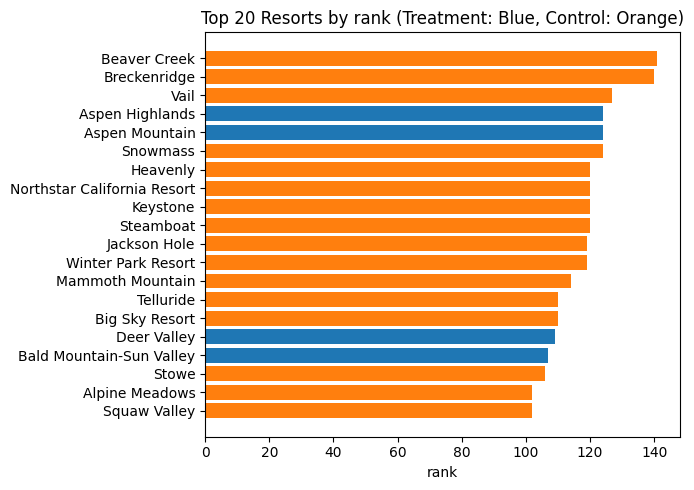

In [254]:
# Top prices resorts

k = 20  # number of top resorts to show
T_COL = 'Snowparks_numeric' if 'Snowparks_numeric' in merged.columns else 'Snowparks'
target = 'Price'

# Get top k resorts by price
# top_df = merged.nsmallest(k, target).copy()
top_df = merged.nlargest(k, target).copy()
top_df = top_df.sort_values(target, ascending=True)

# Assign colors: blue for treatment, orange for control
colors = ['#1f77b4' if t == 1 else '#ff7f0e' for t in top_df[T_COL]]

import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))
plt.barh(top_df['Resort'], top_df[target], color=colors)
plt.xlabel('rank')
plt.title(f'Top {k} Resorts by rank (Treatment: Blue, Control: Orange)')
plt.tight_layout()
plt.show()

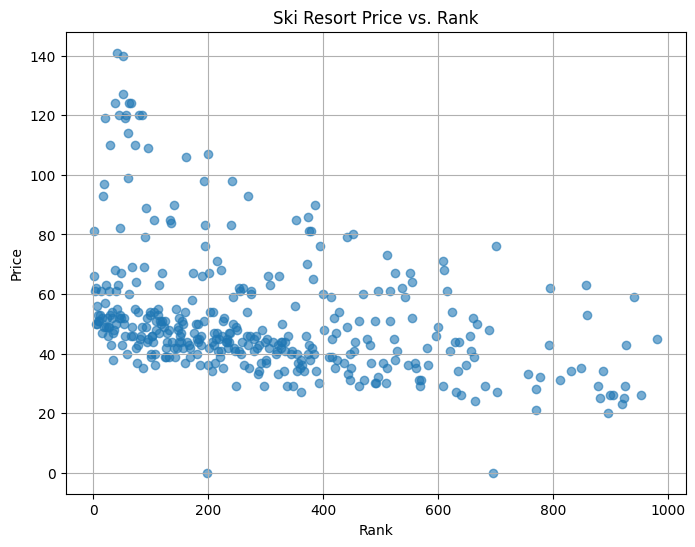

Correlation between Price and rank: -0.379


In [221]:
import matplotlib.pyplot as plt

low_rank_merged = merged[merged['rank'] < 1000]
# Plot Price vs. rank
plt.figure(figsize=(8, 6))
plt.scatter(low_rank_merged['rank'], low_rank_merged['Price'], alpha=0.6)
plt.xlabel('Rank')
plt.ylabel('Price')
plt.title('Ski Resort Price vs. Rank')
plt.grid(True)
plt.show()

# Print the correlation between Price and rank
correlation = low_rank_merged['Price'].corr(low_rank_merged['rank'])
print(f"Correlation between Price and rank: {correlation:.3f}")


In [222]:
# saved merged DF
name = "data/merged_ski_data.csv"
merged.to_csv(name, index=False)

In [223]:
print(merged['rank'].isna().sum())
part_df = merged.dropna(axis=0)  #ski_df #.dropna(axis=0)
print(f"no None merge={len(part_df['ID'])}")
part_df.head(10)

69
no None merge=430


,ID,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,...,Continent_numeric,Season_numeric,Child friendly_numeric,Snowparks_numeric,Nightskiing_numeric,Summer skiing_numeric,key,Rank,Other_name,rank
0,1,Hemsedal,60.928244,8.383487,Norway,Europe,46,November - May,1450,620,...,0,0,0,0,0,0,hemsedal,69.0,Hemsedal,69.0
1,2,Geilosiden Geilo,60.534526,8.206372,Norway,Europe,44,November - April,1178,800,...,0,1,0,0,0,0,geilosiden geilo,259.0,Geilo,259.0
2,3,Golm,47.057810,9.828167,Austria,Europe,48,December - April,2110,650,...,0,2,0,1,1,0,golm,250.0,Golm,250.0
3,4,Red Mountain Resort-Rossland,49.105520,-117.846280,Canada,North America,60,December - April,2075,1185,...,1,2,0,0,0,0,red rossland,275.0,Red Mountain Resort,275.0
4,5,Hafjell,61.230369,10.529014,Norway,Europe,45,November - April,1030,195,...,0,1,0,0,0,0,hafjell,219.0,Hafjell,219.0
5,6,Voss,60.683706,6.407905,Norway,Europe,43,November - May,960,284,...,0,0,0,0,1,0,voss,288.0,Voss Resort,288.0
8,9,Hochschwarzeck,47.628373,12.920528,Germany,Europe,22,December - April,1385,1030,...,0,2,0,1,1,0,hochschwarzeck,1200.0,Hochschwarzeck,1200.0
9,10,Rossfeld - Berchtesgaden - Oberau,47.651306,13.058977,Germany,Europe,20,December - April,1554,1300,...,0,2,0,0,0,0,rossfeld berchtesgaden oberau,1291.0,Rossfeld,1291.0
10,11,Fernie,49.504175,-115.062867,Canada,North America,67,December - April,2134,1052,...,1,2,0,0,1,0,fernie,120.0,Fernie,120.0
11,12,Sun Peaks,50.884468,-119.882329,Canada,North America,62,November - April,2082,1198,...,1,1,0,0,0,0,sun peaks,253.0,Sun Peaks,253.0


In [224]:
# Rank ATE
import numpy as np
# Rank ATE
# Rank ATE - Fixed Version
print("=== DIAGNOSTIC INFORMATION ===")

# Check the actual values in Snowparks columns
def basic_ATE(df, target_col):
    print("\n'Snowparks_numeric' column values:")
    print(df['Snowparks_numeric'].value_counts())

    # Use the correct column name (likely Snowparks_numeric based on your data processing)
    snowparks_col = 'Snowparks_numeric' if 'Snowparks_numeric' in df.columns else 'Snowparks'

    # Check if we have data for both groups
    with_sp_data = df[df[snowparks_col] == 1][target_col]
    without_sp_data = df[df[snowparks_col] == 0][target_col]

    print(f"\nNumber of resorts with snowparks (treatment=1): {len(with_sp_data)}")
    print(f"Number of resorts without snowparks (treatment=0): {len(without_sp_data)}")

    # Calculate ATE only if we have data in both groups
    if len(with_sp_data) > 0 and len(without_sp_data) > 0:
        with_sp = np.mean(with_sp_data)
        without_sp = np.mean(without_sp_data)
        ate = with_sp - without_sp

        print(f"\nMean {target_col} for resorts WITH snowparks: {with_sp:.2f}")
        print(f"Mean {target_col} for resorts WITHOUT snowparks: {without_sp:.2f}")
        print(f"Average Treatment Effect (ATE): {ate:.2f}")
        
        # Interpretation
        if target_col.lower() == 'rank':
            if ate < 0:
                print("Interpretation: Having snowparks is associated with BETTER ranking (lower rank number)")
            else:
                print("Interpretation: Having snowparks is associated with WORSE ranking (higher rank number)")
        else:
            if ate > 0:
                print("Interpretation: Having snowparks is associated with BETTER outcomes (higher price)")
            else:
                print("Interpretation: Having snowparks is associated with WORSE outcomes (lower price)")
    else:
        print("\nCannot calculate ATE - missing data in one or both treatment groups")
        if len(with_sp_data) == 0:
            print("No resorts with snowparks found in the dataset")
        if len(without_sp_data) == 0:
            print("No resorts without snowparks found in the dataset")

basic_ATE(part_df, 'rank')

=== DIAGNOSTIC INFORMATION ===

'Snowparks_numeric' column values:
Snowparks_numeric
0    336
1     94
Name: count, dtype: int64

Number of resorts with snowparks (treatment=1): 94
Number of resorts without snowparks (treatment=0): 336

Mean rank for resorts WITH snowparks: 705.02
Mean rank for resorts WITHOUT snowparks: 422.06
Average Treatment Effect (ATE): 282.96
Interpretation: Having snowparks is associated with WORSE ranking (higher rank number)


In [225]:
merged.columns

Index(['ID', 'Resort', 'Latitude', 'Longitude', 'Country', 'Continent',
       'Price', 'Season', 'Highest point', 'Lowest point', 'Beginner slopes',
       'Intermediate slopes', 'Difficult slopes', 'Total slopes',
       'Longest run', 'Snow cannons', 'Surface lifts', 'Chair lifts',
       'Gondola lifts', 'Total lifts', 'Lift capacity', 'Child friendly',
       'Snowparks', 'Nightskiing', 'Summer skiing', 'Resort_numeric',
       'Country_numeric', 'Continent_numeric', 'Season_numeric',
       'Child friendly_numeric', 'Snowparks_numeric', 'Nightskiing_numeric',
       'Summer skiing_numeric', 'key', 'Rank', 'Other_name', 'rank'],
      dtype='object')

# Price ATE

In [226]:
import numpy as np
# Price ATE

basic_ATE(merged, 'Price')


'Snowparks_numeric' column values:
Snowparks_numeric
0    378
1    121
Name: count, dtype: int64

Number of resorts with snowparks (treatment=1): 121
Number of resorts without snowparks (treatment=0): 378

Mean Price for resorts WITH snowparks: 40.39
Mean Price for resorts WITHOUT snowparks: 51.39
Average Treatment Effect (ATE): -11.00
Interpretation: Having snowparks is associated with WORSE outcomes (lower price)


In [277]:
import numpy as np

import matplotlib.pyplot as plt

# Calculate means for Price and Rank
mean_price_treatment = merged[merged['Snowparks_numeric'] == 1]['Price'].mean()
mean_price_control = merged[merged['Snowparks_numeric'] == 0]['Price'].mean()
mean_rank_treatment = merged[merged['Snowparks_numeric'] == 1]['Rank'].mean()
mean_rank_control = merged[merged['Snowparks_numeric'] == 0]['Rank'].mean()
# Show only the price difference and percentage change
price_diff = mean_price_treatment - mean_price_control
price_pct_change = (price_diff / mean_price_control) * 100 if mean_price_control != 0 else np.nan

print(f"Mean Price (Treatment): {mean_price_treatment:.2f}")
print(f"Mean Price (Control): {mean_price_control:.2f}")
print(f"Difference: {price_diff:.2f}")
print(f"Percentage Change: {price_pct_change:.2f}%")


rank_diff = mean_rank_treatment - mean_rank_control
rank_pct_change = (rank_diff / mean_rank_control) * 100 if mean_rank_control != 0 else np.nan

print(f"Mean Rank (Treatment): {mean_rank_treatment:.2f}")
print(f"Mean Rank (Control): {mean_rank_control:.2f}")
print(f"Difference: {rank_diff:.2f}")
print(f"Percentage Change: {rank_pct_change:.2f}%")


Mean Price (Treatment): 40.39
Mean Price (Control): 51.39
Difference: -11.00
Percentage Change: -21.41%
Mean Rank (Treatment): 705.02
Mean Rank (Control): 422.06
Difference: 282.96
Percentage Change: 67.04%


## Predict the target

In [227]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

target = 'Price'

if target == 'Rank':
    df = merged_clean
else:
    df = merged
numeric_cols = df.select_dtypes(include=[np.number]).columns
confounders = [col for col in numeric_cols if col not in ['Price', 'Rank', 'rank', 'ID', 'Snowparks_numeric', 'Resort_numeric']]
X = df[confounders]
treatment = 'Snowparks_numeric' #'Nightskiing'
# T = df_student[treatment]
y = df[target] #['Adult']
X = df[confounders]
# Remove the treatment column from confounders and select only those columns
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
confounders



['Latitude',
 'Longitude',
 'Highest point',
 'Lowest point',
 'Beginner slopes',
 'Intermediate slopes',
 'Difficult slopes',
 'Total slopes',
 'Longest run',
 'Snow cannons',
 'Surface lifts',
 'Chair lifts',
 'Gondola lifts',
 'Total lifts',
 'Lift capacity',
 'Country_numeric',
 'Continent_numeric',
 'Season_numeric',
 'Child friendly_numeric',
 'Nightskiing_numeric',
 'Summer skiing_numeric']

In [228]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
print("Linear Regression Train R^2:", lr_reg.score(X_train, y_train))
print("Linear Regression Test R^2:", lr_reg.score(X_test, y_test))

# Train a Random Forest Regressor with reduced complexity to prevent overfitting
rf = RandomForestRegressor(
    n_estimators=50,        # fewer trees
    max_depth=4,            # limit tree depth
    min_samples_leaf=10,    # require more samples per leaf
    random_state=42
)
rf.fit(X_train, y_train)

# Print train and test R^2 score
print("Random Forest Train R^2:", rf.score(X_train, y_train))
print("Random Forest Test R^2:", rf.score(X_test, y_test))

xgb = XGBRegressor(
    n_estimators=50,        # fewer boosting rounds
    max_depth=3,            # shallower trees
    min_child_weight=10,    # require more samples per leaf
    subsample=0.7,          # use a fraction of data for each tree
    colsample_bytree=0.7,   # use a fraction of features for each tree
    random_state=42
)
xgb.fit(X_train, y_train)
print("XGBoost Train R^2:", xgb.score(X_train, y_train))
print("XGBoost Test R^2:", xgb.score(X_test, y_test))


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate Linear Regression
y_pred_lr = lr_reg.predict(X_test)
print("Linear Regression Metrics:")
print("  R^2:", r2_score(y_test, y_pred_lr))
print("  MSE:", mean_squared_error(y_test, y_pred_lr))
print("  MAE:", mean_absolute_error(y_test, y_pred_lr))

# Evaluate Random Forest
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Metrics:")
print("  R^2:", r2_score(y_test, y_pred_rf))
print("  MSE:", mean_squared_error(y_test, y_pred_rf))
print("  MAE:", mean_absolute_error(y_test, y_pred_rf))

# Evaluate XGBoost
y_pred_xgb = xgb.predict(X_test)
print("\nXGBoost Metrics:")
print("  R^2:", r2_score(y_test, y_pred_xgb))
print("  MSE:", mean_squared_error(y_test, y_pred_xgb))
print("  MAE:", mean_absolute_error(y_test, y_pred_xgb))



Linear Regression Train R^2: 0.5639576323278823
Linear Regression Test R^2: 0.5177063593867687
Random Forest Train R^2: 0.7766864942293195
Random Forest Test R^2: 0.7081028826633755
XGBoost Train R^2: 0.9471554160118103
XGBoost Test R^2: 0.6968917846679688
Linear Regression Metrics:
  R^2: 0.5177063593867687
  MSE: 223.10300947717315
  MAE: 10.545088510032402

Random Forest Metrics:
  R^2: 0.7081028826633755
  MSE: 135.02795776595582
Random Forest Train R^2: 0.7766864942293195
Random Forest Test R^2: 0.7081028826633755
XGBoost Train R^2: 0.9471554160118103
XGBoost Test R^2: 0.6968917846679688
Linear Regression Metrics:
  R^2: 0.5177063593867687
  MSE: 223.10300947717315
  MAE: 10.545088510032402

Random Forest Metrics:
  R^2: 0.7081028826633755
  MSE: 135.02795776595582
  MAE: 7.9456082583352705

XGBoost Metrics:
  R^2: 0.6968917846679688
  MSE: 140.2140655517578
  MAE: 6.555966854095459
  MAE: 7.9456082583352705

XGBoost Metrics:
  R^2: 0.6968917846679688
  MSE: 140.2140655517578
  MA

Top features by importance (Random Forest):
Longitude: 0.534
Intermediate slopes: 0.099
Lift capacity: 0.095
Country_numeric: 0.068
Lowest point: 0.036
Latitude: 0.026
Highest point: 0.026
Total slopes: 0.025
Gondola lifts: 0.019
Total lifts: 0.017


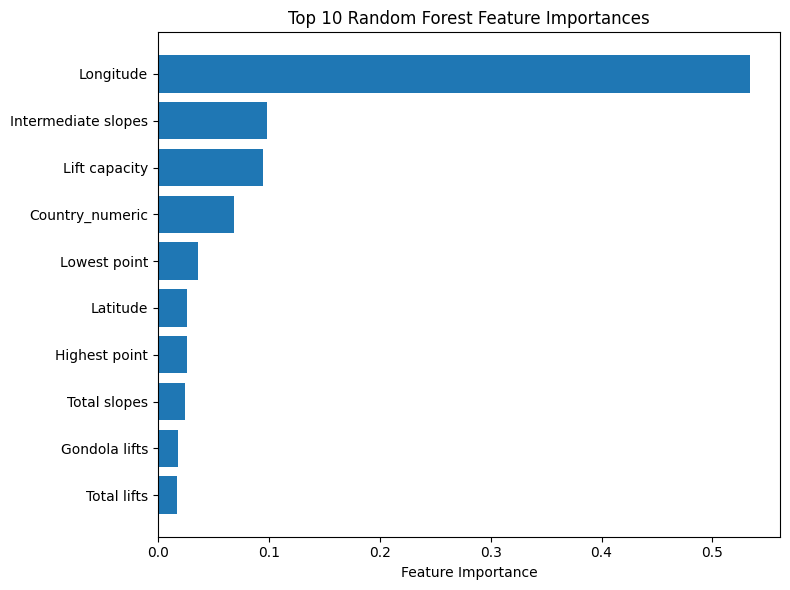

In [ ]:
# Show the most important features for the Random Forest model (rf)
importances_target = rf.feature_importances_
feature_names = X_train.columns

# Sort features by importance
sorted_idx = importances_target.argsort()[::-1]
target_importances_features_names = feature_names[sorted_idx[:10]]
print("Top features by importance (Random Forest):")
for i in sorted_idx[:10]:
    print(f"{feature_names[i]}: {importances_target[i]:.3f}")

# Plot feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.barh([feature_names[i] for i in sorted_idx[:10]], importances_target[sorted_idx[:10]])
plt.xlabel("Feature Importance")
plt.title("Top 10 Random Forest Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()  

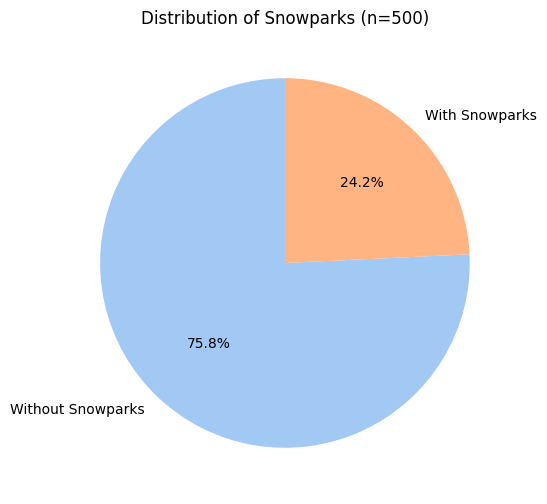

In [230]:
import seaborn as sns
import matplotlib.pyplot as plt

column  = "Snowparks_numeric" # "Snowparks"
# Count the occurrences for each value in the column
counts = ski_df[column].value_counts().sort_index()
labels_names = {1: 'With Snowparks', 0: 'Without Snowparks'}
labels = [labels_names[val] for val in counts.index]

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title(f"Distribution of Snowparks (n=500)")
plt.show()



In [256]:
ski_df.columns

Index(['ID', 'Resort', 'Latitude', 'Longitude', 'Country', 'Continent',
       'Price', 'Season', 'Highest point', 'Lowest point', 'Beginner slopes',
       'Intermediate slopes', 'Difficult slopes', 'Total slopes',
       'Longest run', 'Snow cannons', 'Surface lifts', 'Chair lifts',
       'Gondola lifts', 'Total lifts', 'Lift capacity', 'Child friendly',
       'Snowparks', 'Nightskiing', 'Summer skiing', 'Resort_numeric',
       'Country_numeric', 'Continent_numeric', 'Season_numeric',
       'Child friendly_numeric', 'Snowparks_numeric', 'Nightskiing_numeric',
       'Summer skiing_numeric', 'key', 'Rank', 'Other_name'],
      dtype='object')

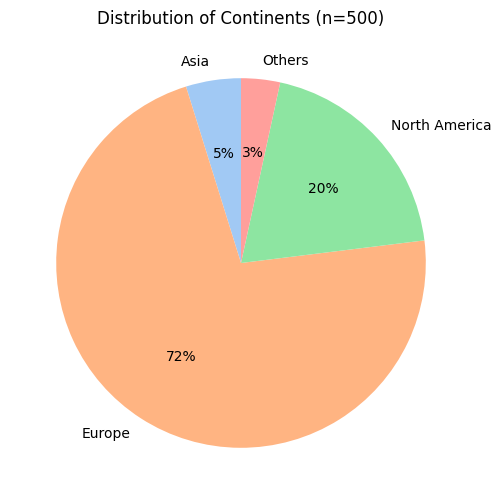

In [262]:
import seaborn as sns
import matplotlib.pyplot as plt

column  = "Continent" # "Snowparks"
# Count the occurrences for each value in the column
counts = ski_df[column].value_counts().sort_index()
# If a continent has less than 5% of the resorts, group it as 'Others'
threshold = 0.04 * counts.sum()
counts_grouped = counts.copy()
low_count_labels = counts[counts < threshold].index
counts_grouped['Others'] = counts_grouped[low_count_labels].sum()
counts_grouped = counts_grouped.drop(low_count_labels)
labels = [val for val in counts_grouped.index]
counts = counts_grouped
# labels_names = {1: 'With Snowparks', 0: 'Without Snowparks'}
labels = [val for val in counts.index]

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.0f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title(f"Distribution of Continents (n=500)")
plt.show()



## Basic ATE Treatment = SnowParks

In [231]:
target = "Price"
mean_price_snowparks_0 = ski_df[ski_df[column] == 0][target].mean()
mean_price_snowparks_1 = ski_df[ski_df[column] == 1][target].mean()
print("Mean Price for Snowparks=0:", round(mean_price_snowparks_0, 2))
print("Mean Price for Snowparks=1:", round(mean_price_snowparks_1, 2))

Mean Price for Snowparks=0: 51.39
Mean Price for Snowparks=1: 40.39


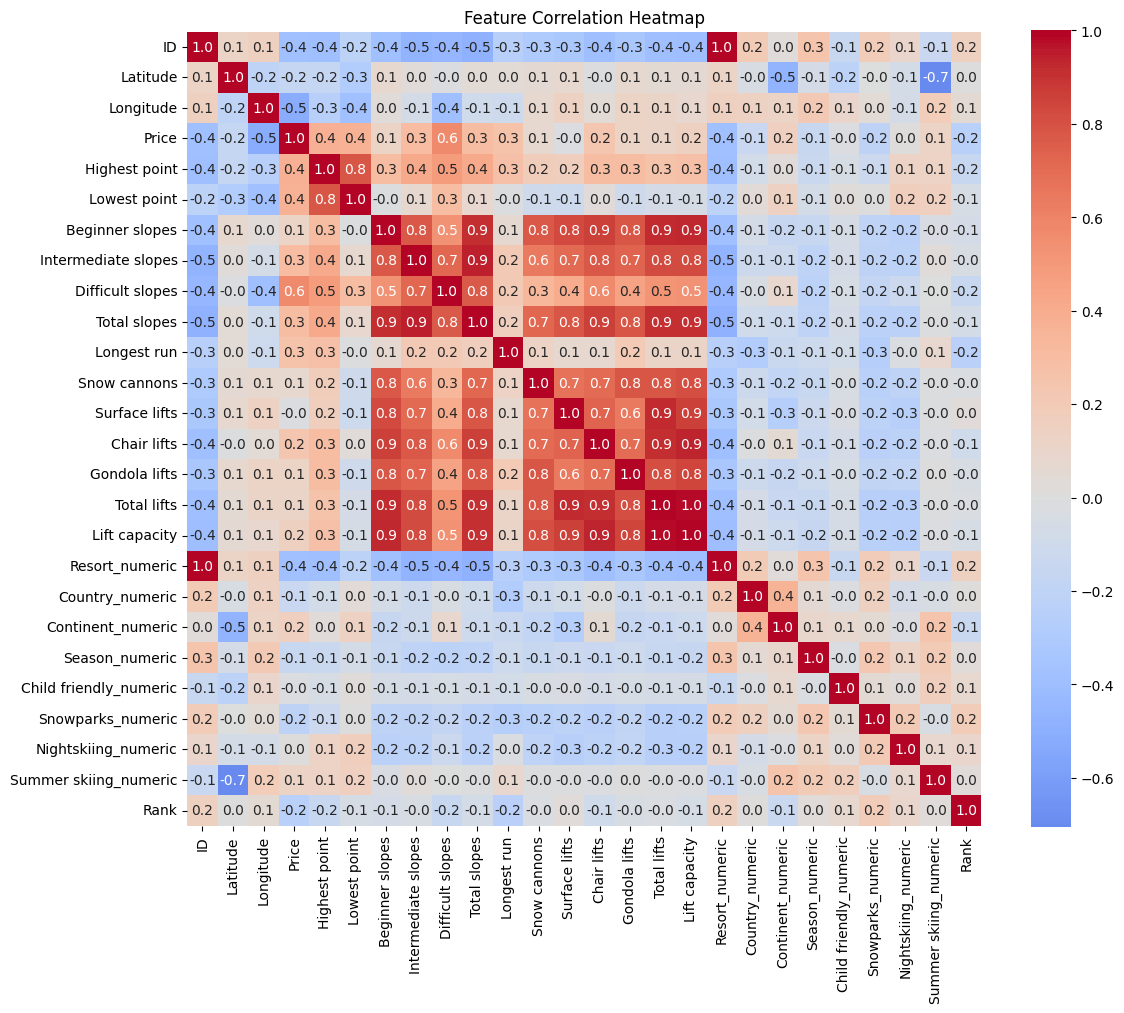

In [232]:
# Features Heatmap

import seaborn as sns
import matplotlib.pyplot as plt
# Convert boolean columns to numeric (0/1)

# Calculate correlation matrix
correlation_matrix = ski_df.select_dtypes(include=['float64', 'int64']).corr()

# Create a figure with a larger size
plt.figure(figsize=(12, 10))

# Create heatmap
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Color scheme
            center=0,  # Center the colormap at 0
            fmt='.1f',  # Round to 2 decimal places
            square=True)  # Make cells square

plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# Casual Inference methods

## Method 1: Propensity Score Matching (PSM)

We estimate the causal effect of Snowparks (treatment=1 if a resort has snowparks) on Price (lift ticket price) by:
- Estimating propensity scores P(T=1|X) with Logistic Regression using numeric confounders.
- Matching treated resorts to nearest control by propensity score (1-to-1, without replacement, caliper).
- Computing the Average Treatment effect on the Treated (ATT) on matched pairs.
- Visualizing propensity overlap and matched mean outcomes.


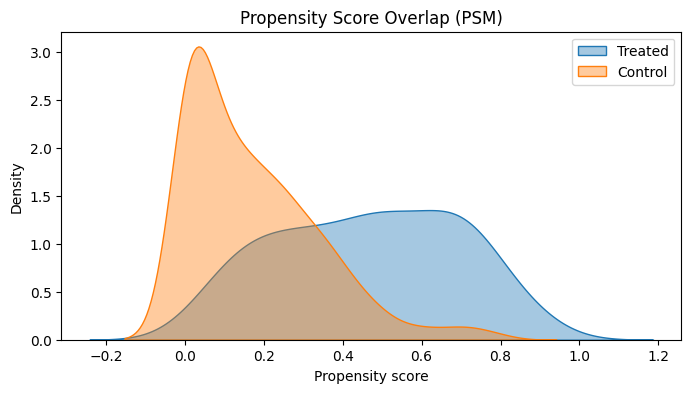

Top features by absolute coefficient (Propensity Model):
Snow cannons: 2.0303
Intermediate slopes: 0.9121
Lift capacity: 0.6439
Chair lifts: 0.6045
Longest run: 0.5530
Beginner slopes: 0.5495
Surface lifts: 0.4348
Total lifts: 0.4016
Nightskiing_numeric: 0.3767
Season_numeric: 0.3609


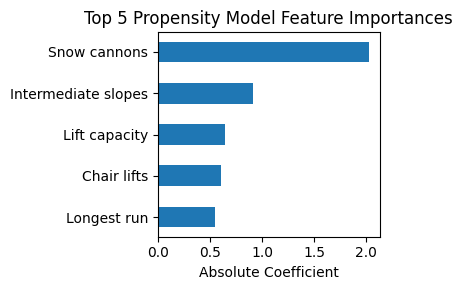

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# === CONFIG ===
# Treatment and outcome
T_COL = 'Snowparks_numeric' if 'Snowparks_numeric' in merged.columns else 'Snowparks'
Y_COL = 'Price'

# Use numeric potential confounders (exclude the outcome, the treatment label, and external labels like Rank)
numeric_cols = merged.select_dtypes(include=[np.number]).columns.tolist()
ban_cols = {Y_COL, 'Rank', T_COL}  # EXCLUDE treatment to avoid leakage
X_cols = [c for c in numeric_cols if c not in ban_cols]

# Filter to rows where treatment and outcome are not NaN
psm_df = merged.dropna(subset=[T_COL, Y_COL]).copy()

# Ensure treatment is binary 0/1
if psm_df[T_COL].dtype != int and psm_df[T_COL].dtype != np.int64:
    # Factorize if not already numeric/binary
    vals = psm_df[T_COL].astype('category').cat.codes
    # Try to map to {0,1}
    # If more than 2 categories, we keep as is but warn in output
    psm_df[T_COL] = (vals > vals.median()).astype(int)

# Prepare X
X = psm_df[X_cols].fillna(0).copy()
# Protect against columns with zero variance
constant_cols = [c for c in X_cols if X[c].nunique(dropna=False) <= 1]
if constant_cols:
    X = X.drop(columns=constant_cols)

# Standardize X for logistic regression stability
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Propensity model
logit = LogisticRegression(max_iter=200, solver='lbfgs')
logit.fit(X_scaled, psm_df[T_COL])
ps = logit.predict_proba(X_scaled)[:, 1]
psm_df['propensity'] = ps

# Check overlap plot
plt.figure(figsize=(8,4))
sns.kdeplot(psm_df.loc[psm_df[T_COL]==1, 'propensity'], label='Treated', fill=True, alpha=0.4)
sns.kdeplot(psm_df.loc[psm_df[T_COL]==0, 'propensity'], label='Control', fill=True, alpha=0.4)
plt.title('Propensity Score Overlap (PSM)')
plt.xlabel('Propensity score')
plt.ylabel('Density')
plt.legend()
plt.show()

# Show the most important features of the propensity model (Logistic Regression)
feature_importance_treatment = np.abs(logit.coef_[0])
sorted_idx = np.argsort(feature_importance_treatment)[::-1]
treatment_feature_names = X.columns[sorted_idx[:5]]
print("Top features by absolute coefficient (Propensity Model):")
for i in sorted_idx[:10]:
    print(f"{X.columns[i]}: {feature_importance_treatment[i]:.4f}")

# Plot feature importances with smaller bar width
plt.figure(figsize=(4, 3))
plt.barh([X.columns[i] for i in sorted_idx[:5]], feature_importance_treatment[sorted_idx[:5]], height=0.5)
plt.xlabel("Absolute Coefficient")
plt.title("Top 5 Propensity Model Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [234]:
# confounders

importances_both = list(set(target_importances_features_names) & set(treatment_feature_names))
importances_both


['Lift capacity', 'Intermediate slopes']

In [235]:
# find the nearest neighbor for each treatment item and calculate 
# 1-to-1 nearest neighbor matching without replacement on propensity score
caliper = 0.3

# For each treated, find the closest available control within caliper
from sklearn.metrics import pairwise_distances

treated_idx = psm_df.index[psm_df[T_COL]==1].to_numpy()
np.random.shuffle(treated_idx)
control_idx = psm_df.index[psm_df[T_COL]==0]

if len(treated_idx) == 0 or len(control_idx) == 0:
    print('PSM: Not enough treated or control units to match.')
else:
    att_list = []
    treated_prices = []
    control_prices = []
    number_of_runs = 100

    for i in range(number_of_runs):
        np.random.shuffle(treated_idx)
        treated_ps = psm_df.loc[treated_idx, 'propensity'].values.reshape(-1,1)
        control_ps = psm_df.loc[control_idx, 'propensity'].values.reshape(-1,1)

        # Compute all pairwise distances
        dists = pairwise_distances(treated_ps, control_ps)
        used_controls = set()
        matches = []
        for i, t_i in enumerate(treated_idx):
            # Sort control candidates by distance
            sorted_cands = np.argsort(dists[i])
            found = False
            for j in sorted_cands:
                c_j = control_idx[j]
                dist = dists[i, j]
                if dist <= caliper and c_j not in used_controls:
                    used_controls.add(c_j)
                    matches.append((t_i, c_j, dist))
                    found = True
                if found:
                    break

        # print(f'Matched pairs within caliper {caliper}: {len(matches)}')

        if len(matches) == 0:
            print('PSM: No pairs matched under the caliper constraint.')
        else:
            # Compute ATT using matched pairs
            diffs = []
            treatment_price = []
            control_price = []
            for t_i, c_j, _ in matches:
                y_t = psm_df.at[t_i, Y_COL]
                y_c = psm_df.at[c_j, Y_COL]
                diffs.append(y_t - y_c)
                treatment_price.append(y_t)
                control_price.append(y_c)
            att = float(np.mean(diffs))
            att_list.append(att)
            treated_prices.append(np.mean(treatment_price))
            control_prices.append(np.mean(control_price))

print(f'att mean={np.mean(att_list):.2f} std={np.std(att_list):.2f} over {number_of_runs} runs')
print("mean match treatment:", np.mean(treated_prices))
print("mean match control:", np.mean(control_prices))


att mean=-4.27 std=0.58 over 100 runs
mean match treatment: 41.97462936134794
mean match control: 46.248791874709575


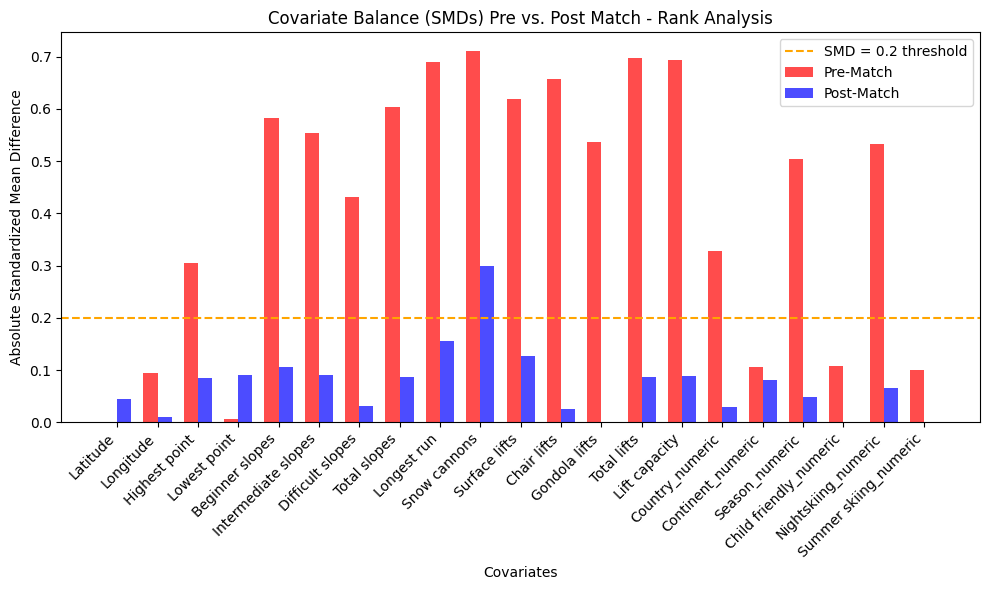

Number of covariates with |SMD| > 0.2 pre-match: 15
Number of covariates with |SMD| > 0.2 post-match: 1


In [236]:
# Covariate Balance Analysis for Rank PSM
def calculate_smd(x_treated, x_control):
    """Calculate standardized mean difference"""
    mean_t = np.mean(x_treated)
    mean_c = np.mean(x_control)
    var_t = np.var(x_treated, ddof=1)
    var_c = np.var(x_control, ddof=1)
    pooled_std = np.sqrt((var_t + var_c) / 2)
    if pooled_std == 0:
        return 0
    return (mean_t - mean_c) / pooled_std

# Calculate SMDs pre-match
smd_pre = []
covariate_names = []
for col in confounders:
    if col in psm_df.columns:
        treated_vals = psm_df[psm_df[T_COL]==1][col]
        control_vals = psm_df[psm_df[T_COL]==0][col]
        smd = calculate_smd(treated_vals, control_vals)
        smd_pre.append(abs(smd))
        covariate_names.append(col)

# Calculate SMDs post-match
smd_post = []
if len(matches) > 0:
    matched_treated_idx = [t for t, _, _ in matches]
    matched_control_idx = [c for _, c, _ in matches]
    
    for col in confounders:
        if col in psm_df.columns:
            treated_vals = psm_df.loc[matched_treated_idx, col]
            control_vals = psm_df.loc[matched_control_idx, col]
            smd = calculate_smd(treated_vals, control_vals)
            smd_post.append(abs(smd))

    # Create balance plot
    balance_df = pd.DataFrame({
        'Covariate': covariate_names,
        'Pre_Match': smd_pre,
        'Post_Match': smd_post
    })
    
    plt.figure(figsize=(10, 6))
    x = np.arange(len(covariate_names))
    width = 0.35
    
    threshold = 0.2
    plt.bar(x - width/2, smd_pre, width, label='Pre-Match', alpha=0.7, color='red')
    plt.bar(x + width/2, smd_post, width, label='Post-Match', alpha=0.7, color='blue')

    plt.axhline(y=threshold, color='orange', linestyle='--', label=f'SMD = {threshold} threshold')

    plt.xlabel('Covariates')
    plt.ylabel('Absolute Standardized Mean Difference')
    plt.title('Covariate Balance (SMDs) Pre vs. Post Match - Rank Analysis')
    plt.xticks(x, covariate_names, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"Number of covariates with |SMD| > {threshold} pre-match: {sum(1 for smd in smd_pre if smd > threshold)}")
    print(f"Number of covariates with |SMD| > {threshold} post-match: {sum(1 for smd in smd_post if smd > threshold)}")

else:
    print("No matches found, cannot calculate post-match SMDs")

In [237]:
merged.columns

Index(['ID', 'Resort', 'Latitude', 'Longitude', 'Country', 'Continent',
       'Price', 'Season', 'Highest point', 'Lowest point', 'Beginner slopes',
       'Intermediate slopes', 'Difficult slopes', 'Total slopes',
       'Longest run', 'Snow cannons', 'Surface lifts', 'Chair lifts',
       'Gondola lifts', 'Total lifts', 'Lift capacity', 'Child friendly',
       'Snowparks', 'Nightskiing', 'Summer skiing', 'Resort_numeric',
       'Country_numeric', 'Continent_numeric', 'Season_numeric',
       'Child friendly_numeric', 'Snowparks_numeric', 'Nightskiing_numeric',
       'Summer skiing_numeric', 'key', 'Rank', 'Other_name', 'rank'],
      dtype='object')

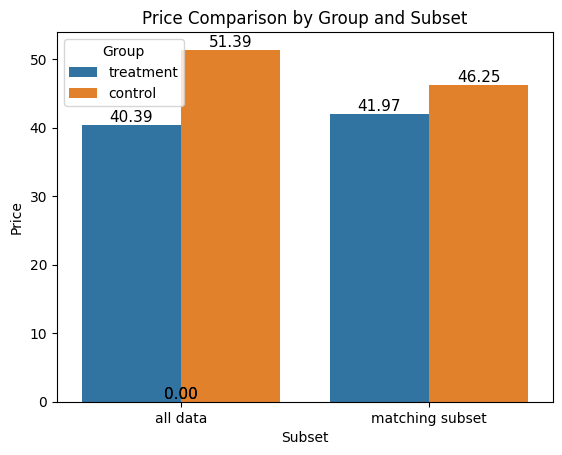

In [238]:
# before and after matching compression


compression = {'price': [merged[merged['Snowparks_numeric'] == 1]['Price'].mean(), np.mean(treated_prices) , merged[merged['Snowparks_numeric'] == 0]['Price'].mean(), np.mean(control_prices)], 
               'group': ['treatment', 'treatment', 'control', 'control'], 
               'Subset': ['all data', 'matching subset', 'all data', 'matching subset']}
compression = pd.DataFrame(compression)
sns.barplot(data=compression, x='Subset', y='price', hue='group', palette=['#1f77b4', '#ff7f0e'])
#add title and labels
plt.title('Price Comparison by Group and Subset')
plt.xlabel('Subset')
plt.ylabel('Price')
plt.legend(title='Group')
# Add bar counts on top of each bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black')
plt.show()


## Method 2: T-Learner (Two-Model Approach)

We fit two outcome models: one on treated units Y|T=1 and one on control units Y|T=0, using the same confounders X. The individual treatment effect (ITE) is the difference f1(X) - f0(X). We report the ATE and ATT and visualize the ITE distribution and CATE by key features.


T-Learner R^2 treated model (holdout): 0.5534770574839523
T-Learner R^2 control model (holdout): 0.7625044599114336
T-Learner ATE: -2.90 | ATT: -1.51 | ATC: -3.35


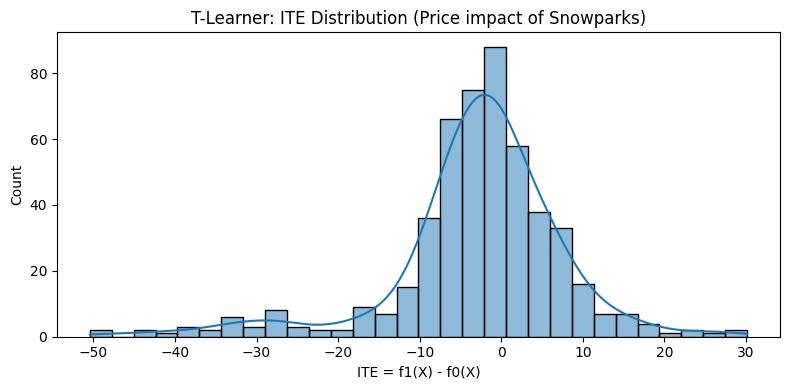

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Reuse columns and df from PSM setup if available

T_COL = 'Snowparks_numeric' if 'Snowparks_numeric' in merged.columns else 'Snowparks'
Y_COL = 'Price'
numeric_cols = merged.select_dtypes(include=[np.number]).columns.tolist()
ban_cols = {Y_COL, 'Rank', 'rank'}
X_cols = [c for c in numeric_cols if c not in ban_cols]

# Prepare data for T-learner
T_df = merged.dropna(subset=[T_COL, Y_COL]).copy()
X = T_df[X_cols].fillna(0)
Y = T_df[Y_COL]
T = T_df[T_COL]


# Split train/test to gauge model fit (optional)
X_train, X_test, Y_train, Y_test, T_train, T_test = train_test_split(X, Y, T, test_size=0.2, random_state=42, stratify=T)

# Models for treated and control
rf_t = RandomForestRegressor(n_estimators=150, max_depth=None, random_state=42)
rf_c = RandomForestRegressor(n_estimators=150, max_depth=None, random_state=42)

rf_t.fit(X_train[T_train==1], Y_train[T_train==1])
rf_c.fit(X_train[T_train==0], Y_train[T_train==0])

# Quick fit diagnostics
if (T_test==1).any() and (T_test==0).any():
    yhat_t = rf_t.predict(X_test[T_test==1])
    yhat_c = rf_c.predict(X_test[T_test==0])
    print('T-Learner R^2 treated model (holdout):', r2_score(Y_test[T_test==1], yhat_t))
    print('T-Learner R^2 control model (holdout):', r2_score(Y_test[T_test==0], yhat_c))

# ITE: f1(X) - f0(X)
f1_all = rf_t.predict(X)
f0_all = rf_c.predict(X)
ITE = f1_all - f0_all

# Aggregate effects
ATE = float(np.mean(ITE))
ATT = float(np.mean(ITE[T==1])) if (T==1).any() else np.nan
ATC = float(np.mean(ITE[T==0])) if (T==0).any() else np.nan
print(f'T-Learner ATE: {ATE:.2f} | ATT: {ATT:.2f} | ATC: {ATC:.2f}')

# Plot ITE distribution
plt.figure(figsize=(8,4))
sns.histplot(ITE, bins=30, kde=True)
plt.title('T-Learner: ITE Distribution (Price impact of Snowparks)')
plt.xlabel('ITE = f1(X) - f0(X)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



## S-Learner

S-learner R^2: 0.963
S-learner MSE: 17.46
S-learner MAE: 2.40
feature importances:
                Feature  Importance
2             Longitude    0.452463
15        Lift capacity    0.090736
6   Intermediate slopes    0.063353
1              Latitude    0.045291
3         Highest point    0.039185
4          Lowest point    0.037518
13        Gondola lifts    0.036636
17      Country_numeric    0.030764
16       Resort_numeric    0.024823
12          Chair lifts    0.024671
14          Total lifts    0.024387
8          Total slopes    0.023198
9           Longest run    0.020693
7      Difficult slopes    0.020616
0                    ID    0.020355


S-learner ATE: -0.06
The mean predicted price for the control group is: 48.75
The mean predicted price for the treatment group is: 48.69


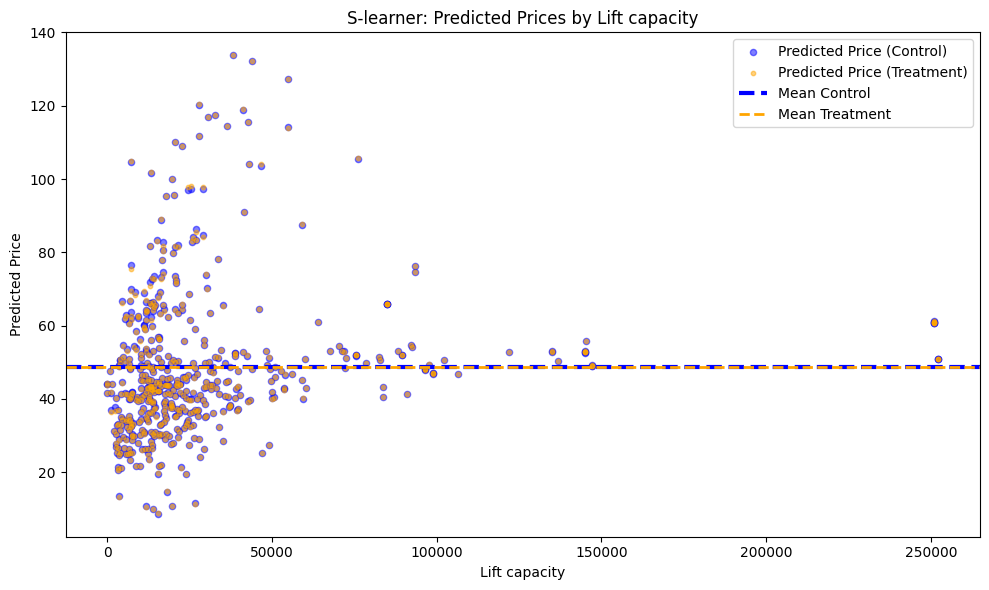

In [240]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt

# S-learner setup
T_COL = 'Snowparks_numeric' if 'Snowparks_numeric' in merged.columns else 'Snowparks'
Y_COL = 'Price'
numeric_cols = merged.select_dtypes(include=[np.number]).columns.tolist()
ban_cols = {Y_COL, 'Rank', 'rank'}
X_cols = [c for c in numeric_cols if c not in ban_cols]

# Prepare data
s_df = merged.dropna(subset=[T_COL, Y_COL, 'Lift capacity']).copy()
X = s_df[X_cols].fillna(0)
T = s_df[T_COL].values.reshape(-1, 1)
Y = s_df[Y_COL].values
lift_capacity = s_df['Lift capacity'].values

# Add treatment as a feature
X_s = X.copy()
X_s['T'] = T

# Fit S-learner model
rf_s = RandomForestRegressor(n_estimators=150, random_state=42)
rf_s.fit(X_s, Y)
# Evaluate S-learner model performance

y_pred = rf_s.predict(X_s)
r2 = r2_score(Y, y_pred)
mse = mean_squared_error(Y, y_pred)
mae = mean_absolute_error(Y, y_pred)

print(f"S-learner R^2: {r2:.3f}")
print(f"S-learner MSE: {mse:.2f}")
print(f"S-learner MAE: {mae:.2f}")
#add feature importances
importances = rf_s.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_s.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(f"feature importances:\n{feature_importance_df[:15]}\n\n")
# Predict potential outcomes for all units under T=1 and T=0
X_treated = X.copy()
X_treated['T'] = 1
X_control = X.copy()
X_control['T'] = 0

y_pred_treated = rf_s.predict(X_treated)
y_pred_control = rf_s.predict(X_control)

# Individual Treatment Effect (ITE) and ATE
ITE = y_pred_treated - y_pred_control
ATE = float(np.mean(ITE))
print(f"S-learner ATE: {ATE:.2f}")
print(f"The mean predicted price for the control group is: {np.mean(y_pred_control):.2f}")
print(f"The mean predicted price for the treatment group is: {np.mean(y_pred_treated):.2f}")

# Plot predicted prices by Lift capacity
plt.figure(figsize=(10, 6))
plt.scatter(lift_capacity, y_pred_control, color='blue', alpha=0.5, label='Predicted Price (Control)', s=20)
plt.scatter(lift_capacity, y_pred_treated, color='orange', alpha=0.5, label='Predicted Price (Treatment)', s=10)
plt.axhline(np.mean(y_pred_control), color='blue', linestyle='--', linewidth=3, label='Mean Control')
plt.axhline(np.mean(y_pred_treated), color='orange', linestyle='--', linewidth=2, label='Mean Treatment')
plt.xlabel('Lift capacity')
plt.ylabel('Predicted Price')
plt.title('S-learner: Predicted Prices by Lift capacity')
plt.legend()
plt.tight_layout()
plt.show()



## Method 3: Doubly Robust Estimation (AIPW)

We estimate the Average Treatment Effect (ATE) of Snowparks on Price using an Augmented Inverse Probability Weighting (AIPW) estimator:
- Step 1: Fit a propensity model P(T=1|X).
- Step 2: Fit two outcome models m1(X)=E[Y|T=1,X], m0(X)=E[Y|T=0,X].
- Step 3: Combine both with the AIPW formula, which is consistent if either the propensity model or the outcome models are correctly specified.
- We use cross-fitting to reduce overfitting bias, then report ATE and a 95% CI, and plot the influence function distribution.


AIPW ATE: -2.59 (95% CI: -7.10, 1.93)


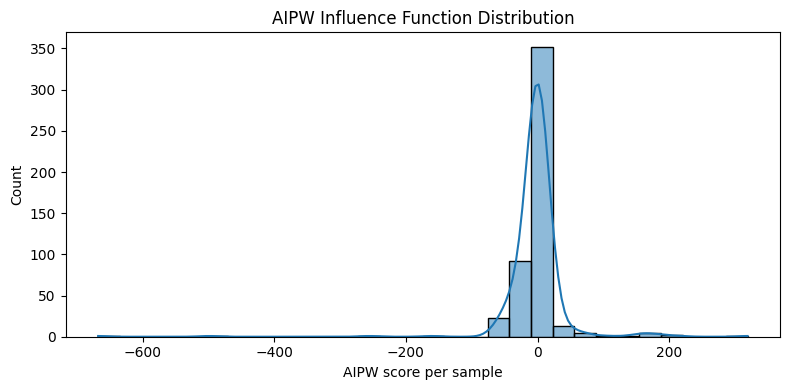

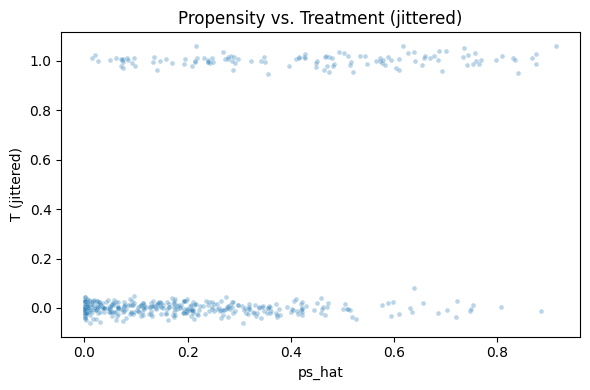

In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Columns and data
T_COL = 'Snowparks_numeric' if 'Snowparks_numeric' in merged.columns else 'Snowparks'
Y_COL = 'Price'

numeric_cols = merged.select_dtypes(include=[np.number]).columns.tolist()
ban_cols = {Y_COL, 'Rank', T_COL}
X_cols = [c for c in numeric_cols if c not in ban_cols]

# Prepare data
cf_df = merged.dropna(subset=[T_COL, Y_COL]).copy()
X = cf_df[X_cols].fillna(0)
Y = cf_df[Y_COL].values
T = cf_df[T_COL].values

# Ensure binary treatment
if len(np.unique(T)) > 2:
    T = (T.astype(float) > np.median(T.astype(float))).astype(int)

# Cross-fitting setup
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)

# Storage
ps_hat = np.zeros(len(cf_df))
mu1_hat = np.zeros(len(cf_df))
mu0_hat = np.zeros(len(cf_df))

for train_idx, test_idx in kf.split(X):
    X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
    T_tr, T_te = T[train_idx], T[test_idx]
    Y_tr, Y_te = Y[train_idx], Y[test_idx]

    # Standardize for propensity only
    scaler = StandardScaler()
    X_tr_scaled = scaler.fit_transform(X_tr)
    X_te_scaled = scaler.transform(X_te)

    # Propensity model
    logit = LogisticRegression(max_iter=200, solver='lbfgs')
    logit.fit(X_tr_scaled, T_tr)
    ps_hat[test_idx] = np.clip(logit.predict_proba(X_te_scaled)[:,1], 1e-3, 1-1e-3)

    # Outcome models
    rf1 = RandomForestRegressor(n_estimators=200, random_state=42)
    rf0 = RandomForestRegressor(n_estimators=200, random_state=42)

    rf1.fit(X_tr[T_tr==1], Y_tr[T_tr==1])
    rf0.fit(X_tr[T_tr==0], Y_tr[T_tr==0])

    mu1_hat[test_idx] = rf1.predict(X_te)
    mu0_hat[test_idx] = rf0.predict(X_te)

# AIPW influence function and ATE
ipw_term = T * (Y - mu1_hat) / ps_hat - (1 - T) * (Y - mu0_hat) / (1 - ps_hat)
aipw_scores = mu1_hat - mu0_hat + ipw_term
ATE = float(aipw_scores.mean())
SE = float(aipw_scores.std(ddof=1) / np.sqrt(len(aipw_scores)))
CI_low = ATE - 1.96 * SE
CI_high = ATE + 1.96 * SE

print(f'AIPW ATE: {ATE:.2f} (95% CI: {CI_low:.2f}, {CI_high:.2f})')

# Plot influence function distribution
plt.figure(figsize=(8,4))
sns.histplot(aipw_scores, bins=30, kde=True)
plt.title('AIPW Influence Function Distribution')
plt.xlabel('AIPW score per sample')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Optional: calibration check for propensity
plt.figure(figsize=(6,4))
sns.scatterplot(x=ps_hat, y=T + np.random.normal(0, 0.02, size=len(T)), alpha=0.3, s=12)
plt.title('Propensity vs. Treatment (jittered)')
plt.xlabel('ps_hat')
plt.ylabel('T (jittered)')
plt.tight_layout()
plt.show()


# Target = Rank

## Causal Inference on Rank Target

We now estimate the effect of Snowparks (treatment) on resort rank using three methods:
- S-Learner (single model with treatment as a feature)
- T-Learner (separate models for treated and control)
- Propensity Score Matching (PSM)

Each method will report ATE and show relevant plots.

S-Learner Rank ATE: 22.10 | ATT: 14.96 | ATC: 24.09


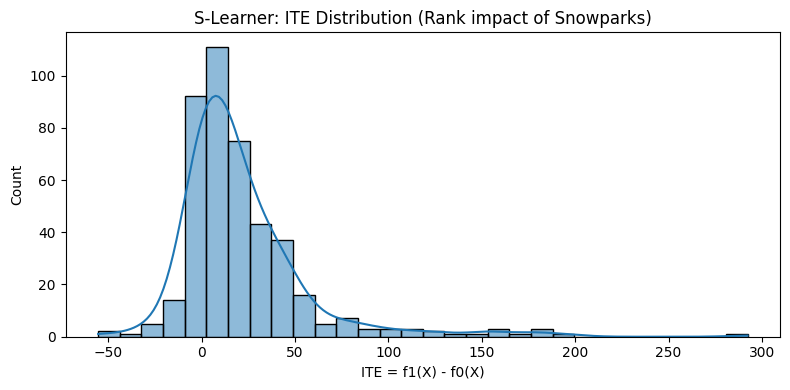

In [242]:
# S-Learner for Rank
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

T_COL = 'Snowparks_numeric' if 'Snowparks_numeric' in merged.columns else 'Snowparks'
Y_COL = 'rank'
numeric_cols = merged.select_dtypes(include=[np.number]).columns.tolist()
ban_cols = {'Price', 'Rank', 'rank'}
X_cols = [c for c in numeric_cols if c not in ban_cols]

rank_df = merged.dropna(subset=[T_COL, Y_COL]).copy()
X = rank_df[X_cols].fillna(0)
T = rank_df[T_COL]
Y = rank_df[Y_COL]

# S-Learner: fit one model with treatment as a feature
X_s = X.copy()
X_s['T'] = T
rf_s = RandomForestRegressor(n_estimators=150, random_state=42)
rf_s.fit(X_s, Y)

# Predict ITE for each unit
X1 = X.copy(); X1['T'] = 1
X0 = X.copy(); X0['T'] = 0
f1_s = rf_s.predict(X1)
f0_s = rf_s.predict(X0)
ITE_s = f1_s - f0_s
ATE_s = float(np.mean(ITE_s))
ATT_s = float(np.mean(ITE_s[T==1])) if (T==1).any() else np.nan
ATC_s = float(np.mean(ITE_s[T==0])) if (T==0).any() else np.nan
print(f'S-Learner Rank ATE: {ATE_s:.2f} | ATT: {ATT_s:.2f} | ATC: {ATC_s:.2f}')

plt.figure(figsize=(8,4))
sns.histplot(ITE_s, bins=30, kde=True)
plt.title('S-Learner: ITE Distribution (Rank impact of Snowparks)')
plt.xlabel('ITE = f1(X) - f0(X)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

T-Learner Rank ATE: 93.74 | ATT: 95.74 | ATC: 93.18


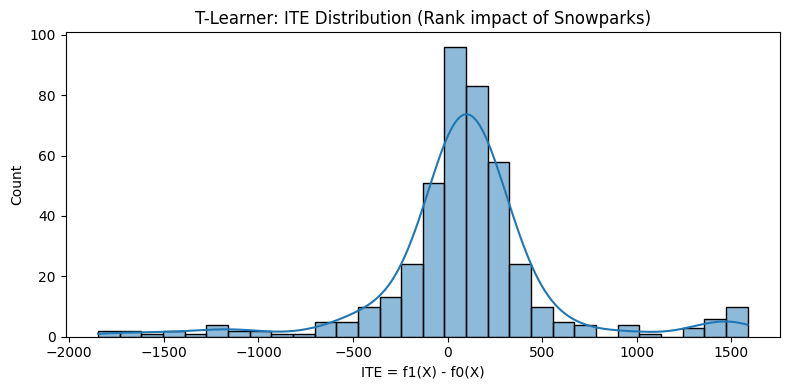

In [243]:
# T-Learner for Rank
from sklearn.ensemble import RandomForestRegressor

# Use same X, T, Y as above
rf_t = RandomForestRegressor(n_estimators=150, random_state=42)
rf_c = RandomForestRegressor(n_estimators=150, random_state=42)
rf_t.fit(X[T==1], Y[T==1])
rf_c.fit(X[T==0], Y[T==0])
f1_t = rf_t.predict(X)
f0_t = rf_c.predict(X)
ITE_t = f1_t - f0_t
ATE_t = float(np.mean(ITE_t))
ATT_t = float(np.mean(ITE_t[T==1])) if (T==1).any() else np.nan
ATC_t = float(np.mean(ITE_t[T==0])) if (T==0).any() else np.nan
print(f'T-Learner Rank ATE: {ATE_t:.2f} | ATT: {ATT_t:.2f} | ATC: {ATC_t:.2f}')

plt.figure(figsize=(8,4))
sns.histplot(ITE_t, bins=30, kde=True)
plt.title('T-Learner: ITE Distribution (Rank impact of Snowparks)')
plt.xlabel('ITE = f1(X) - f0(X)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

##  Propensity Score Matching (PSM)

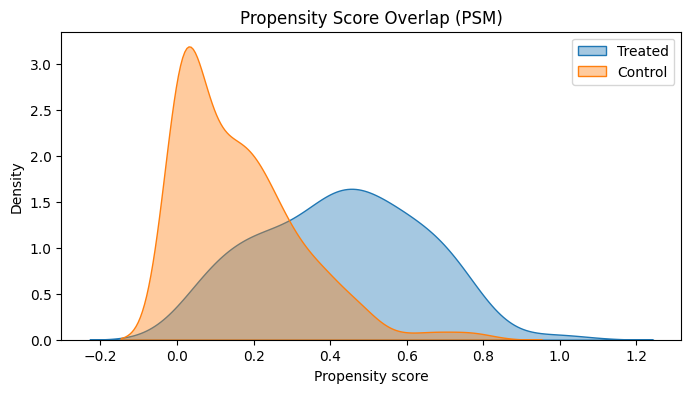

Top features by absolute coefficient (Propensity Model):
Snow cannons: 1.9344
Intermediate slopes: 1.0320
Lift capacity: 0.7956
Chair lifts: 0.6772
Beginner slopes: 0.6185
Longest run: 0.4952
Total lifts: 0.4116
Season_numeric: 0.3889
Nightskiing_numeric: 0.3658
Surface lifts: 0.3495


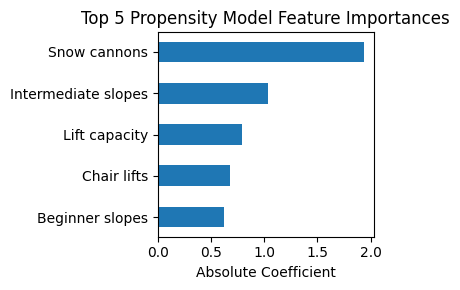

In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# === CONFIG ===
# Treatment and outcome
T_COL = 'Snowparks_numeric' if 'Snowparks_numeric' in merged.columns else 'Snowparks'
Y_COL = 'Rank'

# Use numeric potential confounders (exclude the outcome, the treatment label, and external labels like Rank)
numeric_cols = merged_clean.select_dtypes(include=[np.number]).columns.tolist()
ban_cols = {Y_COL, 'Rank', T_COL}  # EXCLUDE treatment to avoid leakage
X_cols = confounders

# Filter to rows where treatment and outcome are not NaN
psm_df = merged_clean.dropna(subset=[T_COL, Y_COL]).copy()

# Ensure treatment is binary 0/1
if psm_df[T_COL].dtype != int and psm_df[T_COL].dtype != np.int64:
    # Factorize if not already numeric/binary
    vals = psm_df[T_COL].astype('category').cat.codes
    # Try to map to {0,1}
    # If more than 2 categories, we keep as is but warn in output
    psm_df[T_COL] = (vals > vals.median()).astype(int)

# Prepare X
X = psm_df[X_cols].fillna(0).copy()
# Protect against columns with zero variance
constant_cols = [c for c in X_cols if X[c].nunique(dropna=False) <= 1]
if constant_cols:
    X = X.drop(columns=constant_cols)

# Standardize X for logistic regression stability
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Propensity model
logit = LogisticRegression(max_iter=200, solver='lbfgs')
logit.fit(X_scaled, psm_df[T_COL])
ps = logit.predict_proba(X_scaled)[:, 1]
psm_df['propensity'] = ps

# Check overlap plot
plt.figure(figsize=(8,4))
sns.kdeplot(psm_df.loc[psm_df[T_COL]==1, 'propensity'], label='Treated', fill=True, alpha=0.4)
sns.kdeplot(psm_df.loc[psm_df[T_COL]==0, 'propensity'], label='Control', fill=True, alpha=0.4)
plt.title('Propensity Score Overlap (PSM)')
plt.xlabel('Propensity score')
plt.ylabel('Density')
plt.legend()
plt.show()

# Show the most important features of the propensity model (Logistic Regression)
feature_importance_treatment = np.abs(logit.coef_[0])
sorted_idx = np.argsort(feature_importance_treatment)[::-1]
treatment_feature_names = X.columns[sorted_idx[:10]]
print("Top features by absolute coefficient (Propensity Model):")
for i in sorted_idx[:10]:
    print(f"{X.columns[i]}: {feature_importance_treatment[i]:.4f}")

# Plot feature importances
plt.figure(figsize=(4, 3))
plt.barh([X.columns[i] for i in sorted_idx[:5]], feature_importance_treatment[sorted_idx[:5]], height=0.5)
plt.xlabel("Absolute Coefficient")
plt.title("Top 5 Propensity Model Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [245]:
# find the nearest neighbor for each treatment item and calculate 
# 1-to-1 nearest neighbor matching without replacement on propensity score
# === CONFIG ===
caliper = 0.1

# For each treated, find the closest available control within caliper
from sklearn.metrics import pairwise_distances

treated_idx = psm_df.index[psm_df[T_COL]==1].to_numpy()
np.random.shuffle(treated_idx)
control_idx = psm_df.index[psm_df[T_COL]==0]

if len(treated_idx) == 0 or len(control_idx) == 0:
    print('PSM: Not enough treated or control units to match.')
else:
    att_list = []
    treated_prices = []
    control_prices = []
    number_of_runs = 100

    for i in range(number_of_runs):
        np.random.shuffle(treated_idx)
        treated_ps = psm_df.loc[treated_idx, 'propensity'].values.reshape(-1,1)
        control_ps = psm_df.loc[control_idx, 'propensity'].values.reshape(-1,1)

        # Compute all pairwise distances
        dists = pairwise_distances(treated_ps, control_ps)
        used_controls = set()
        matches = []
        for i, t_i in enumerate(treated_idx):
            # Sort control candidates by distance
            sorted_cands = np.argsort(dists[i])
            found = False
            for j in sorted_cands:
                c_j = control_idx[j]
                dist = dists[i, j]
                if dist <= caliper and c_j not in used_controls:
                    used_controls.add(c_j)
                    matches.append((t_i, c_j, dist))
                    found = True
                if found:
                    break

        # print(f'Matched pairs within caliper {caliper}: {len(matches)}')

        if len(matches) == 0:
            print('PSM: No pairs matched under the caliper constraint.')
        else:
            # Compute ATT using matched pairs
            diffs = []
            treatment_price = []
            control_price = []
            for t_i, c_j, _ in matches:
                y_t = psm_df.at[t_i, Y_COL]
                y_c = psm_df.at[c_j, Y_COL]
                diffs.append(y_t - y_c)
                treatment_price.append(y_t)
                control_price.append(y_c)
            att = float(np.mean(diffs))
            att_list.append(att)
            treated_prices.append(np.mean(treatment_price))
            control_prices.append(np.mean(control_price))
att = np.mean(att_list) if att_list else np.nan
print(f'att mean={att:.2f} std={np.std(att_list):.2f} over {number_of_runs} runs')
print("mean match treatment:", np.mean(treated_prices))
print("mean match control:", np.mean(control_prices))

print(len(treated_prices), len(control_prices))

if not att_list:
    print('PSM: No ATT estimates available.')


att mean=139.09 std=27.14 over 100 runs
mean match treatment: 634.8885470218572
mean match control: 495.7987830437725
100 100


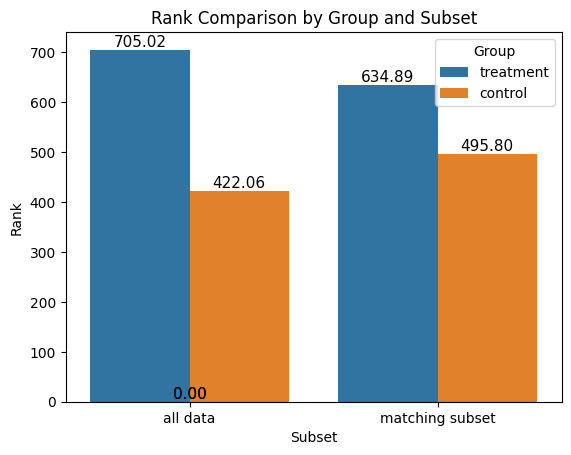

In [246]:
# before and after matching compression


compression = {'rank': [merged[merged['Snowparks_numeric'] == 1]['Rank'].mean(), np.mean(treated_prices) , merged[merged['Snowparks_numeric'] == 0]['Rank'].mean(), np.mean(control_prices)], 
               'group': ['treatment', 'treatment', 'control', 'control'], 
               'Subset': ['all data', 'matching subset', 'all data', 'matching subset']}
compression = pd.DataFrame(compression)
sns.barplot(data=compression, x='Subset', y='rank', hue='group', palette=['#1f77b4', '#ff7f0e'])
#add title and labels
plt.title('Rank Comparison by Group and Subset')
plt.xlabel('Subset')
plt.ylabel('Rank')
plt.legend(title='Group')
# Add bar counts on top of each bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black')
plt.show()

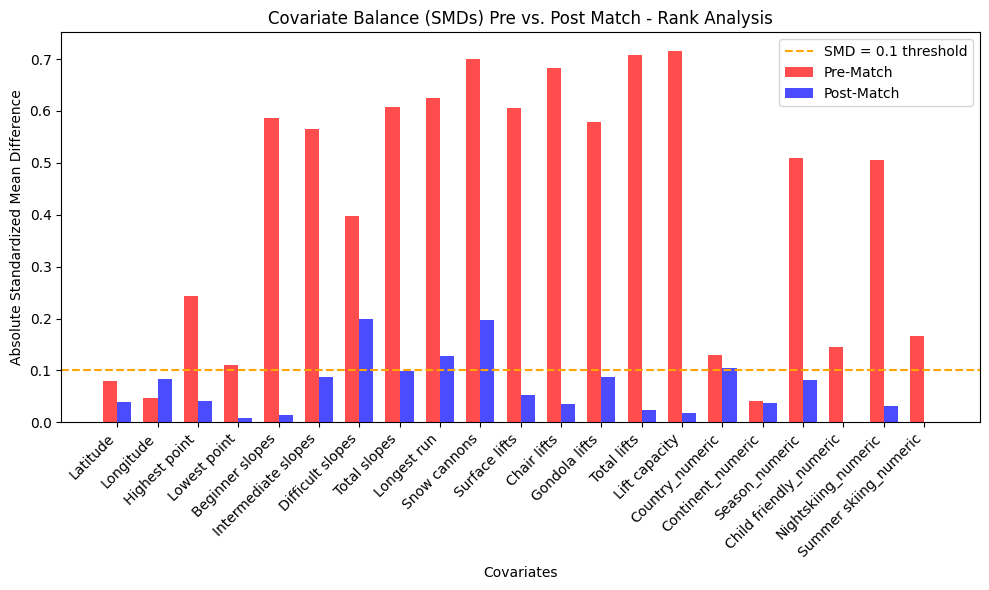

Number of covariates with |SMD| > 0.1 pre-match: 18
Number of covariates with |SMD| > 0.1 post-match: 4


In [247]:
# Covariate Balance Analysis for Rank PSM
def calculate_smd(x_treated, x_control):
    """Calculate standardized mean difference"""
    mean_t = np.mean(x_treated)
    mean_c = np.mean(x_control)
    var_t = np.var(x_treated, ddof=1)
    var_c = np.var(x_control, ddof=1)
    pooled_std = np.sqrt((var_t + var_c) / 2)
    if pooled_std == 0:
        return 0
    return (mean_t - mean_c) / pooled_std

# Calculate SMDs pre-match
smd_pre = []
covariate_names = []
for col in confounders:
    if col in psm_df.columns:
        treated_vals = psm_df[psm_df[T_COL]==1][col]
        control_vals = psm_df[psm_df[T_COL]==0][col]
        smd = calculate_smd(treated_vals, control_vals)
        smd_pre.append(abs(smd))
        covariate_names.append(col)

# Calculate SMDs post-match
smd_post = []
if len(matches) > 0:
    matched_treated_idx = [t for t, _, _ in matches]
    matched_control_idx = [c for _, c, _ in matches]
    
    for col in confounders:
        if col in psm_df.columns:
            treated_vals = psm_df.loc[matched_treated_idx, col]
            control_vals = psm_df.loc[matched_control_idx, col]
            smd = calculate_smd(treated_vals, control_vals)
            smd_post.append(abs(smd))

    # Create balance plot
    balance_df = pd.DataFrame({
        'Covariate': covariate_names,
        'Pre_Match': smd_pre,
        'Post_Match': smd_post
    })
    
    plt.figure(figsize=(10, 6))
    x = np.arange(len(covariate_names))
    width = 0.35
    
    plt.bar(x - width/2, smd_pre, width, label='Pre-Match', alpha=0.7, color='red')
    plt.bar(x + width/2, smd_post, width, label='Post-Match', alpha=0.7, color='blue')
    
    plt.axhline(y=0.1, color='orange', linestyle='--', label='SMD = 0.1 threshold')
    
    plt.xlabel('Covariates')
    plt.ylabel('Absolute Standardized Mean Difference')
    plt.title('Covariate Balance (SMDs) Pre vs. Post Match - Rank Analysis')
    plt.xticks(x, covariate_names, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    print(f"Number of covariates with |SMD| > 0.1 pre-match: {sum(1 for smd in smd_pre if smd > 0.1)}")
    print(f"Number of covariates with |SMD| > 0.1 post-match: {sum(1 for smd in smd_post if smd > 0.1)}")

else:
    print("No matches found, cannot calculate post-match SMDs")